# `pyplot` demo

This standalone notebook demonstrates the plotting capabilities of the `pyutils.pyplot` module.
It shows how to create various types of plots with different styling options
and configurations for scientific data visualisation.

## Overview

This demonstration covers:
- Basic 1D histograms with statistics boxes
- Styled single histograms using the `styles` parameter
- Multi-histogram overlays with custom styling
- Weighted histograms
- 2D histograms and overlays
- Log scale plotting
- Scatter plots with error bars
- Publication-quality styling examples

## 1. Setting up the Environment

First, we import the necessary external packages and set up our logging system.

In [1]:
# Import necessary external packages
import numpy as np
import matplotlib.pyplot as plt

# Import and setup the logger for consistent messaging
from pyutils.pylogger import Logger

# Initialise logger with demo-specific prefix
logger = Logger(print_prefix="[pyplot demo]", verbosity=2)

## 2. Generating example data

Create synthetic datasets that mimic physics analysis data. This includes signal data, background data (broader distribution), and detector efficiency weights.

In [2]:
logger.log("Starting data generation for plotting demonstrations", "info")

# Simulate detector response data
np.random.seed(42)  # For reproducible results

# Signal data: narrow peak around 105 MeV (muon mass-like)
signal_momentum = np.random.normal(105.0, 2.5, 5000)
signal_time = np.random.normal(800, 150, 5000)

# Background data: broader distribution
background_momentum = np.random.exponential(20, 8000) + 80
background_time = np.random.uniform(400, 1600, 8000)

# Combined dataset
all_momentum = np.concatenate([signal_momentum, background_momentum])
all_time = np.concatenate([signal_time, background_time])

# Detector efficiency weights 
signal_weights = np.random.uniform(0.8, 1.0, len(signal_momentum))
background_weights = np.random.uniform(0.3, 0.9, len(background_momentum))

logger.log(f"Generated {len(signal_momentum)} signal events", "info")
logger.log(f"Generated {len(background_momentum)} background events", "info")

[pyplot demo] ⭐️ Starting data generation for plotting demonstrations
[pyplot demo] ⭐️ Generated 5000 signal events
[pyplot demo] ⭐️ Generated 8000 background events


## 3. Initialising pyplot

Import the Plot class and initialise it with appropriate verbosity settings.

In [3]:
# Import the Plot class
from pyutils.pyplot import Plot 

# Initialise the plotter with increased verbosity
plotter = Plot(verbosity=2)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 2


## 4. Basic 1D Histogram

Create a simple 1D histogram showing the momentum distribution with statistics box, errors, and error bars.

[pyplot demo] ⭐️ Creating basic 1D histogram demonstration
[pyplot] ✅ Wrote:
	demo_momentum_basic.png


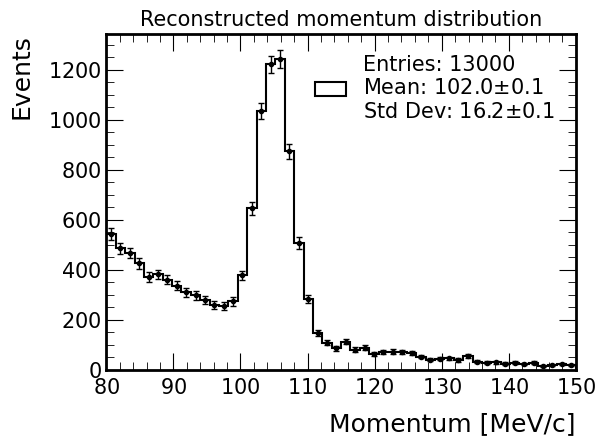

In [4]:
logger.log("Creating basic 1D histogram demonstration", "info")

# Create a simple 1D histogram of momentum
plotter.plot_1D(
    array=all_momentum,
    nbins=50,
    xmin=80,
    xmax=150,
    title="Reconstructed momentum distribution",
    xlabel="Momentum [MeV/c]",
    ylabel="Events",
    out_path="demo_momentum_basic.png",
    stat_box=True,
    stat_box_errors=True,
    error_bars=True
)

# Uncomment to see help for the method
# help(plotter.plot_1D)

## 5. Styled 1D histogram

Demonstrate the new `styles` parameter for single histograms. This allows you to customise histogram type, colours, transparency, and line properties.

[pyplot demo] ⭐️ Demonstrating styled 1D histogram with new styles parameter
[pyplot] ✅ Wrote:
	demo_momentum_styled.png


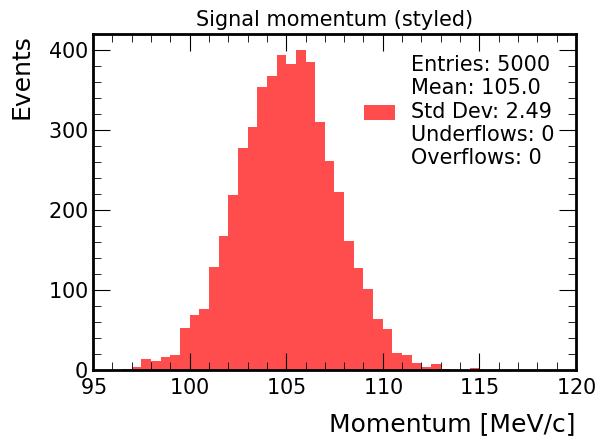

In [18]:
logger.log("Demonstrating styled 1D histogram with new styles parameter", "info")

# Demonstrate the new styles parameter for single histograms
style_config = {
    "histtype": "stepfilled",
    "color": "red", 
    "alpha": 0.7,
    "linewidth": 2
}

plotter.plot_1D(
    array=signal_momentum,
    styles=style_config,
    nbins=50,
    xmin=95,
    xmax=120,
    title="Signal momentum (styled)",
    xlabel="Momentum [MeV/c]",
    ylabel="Events",
    out_path="demo_momentum_styled.png",
    stat_box=True,
    under_over=True,  # Show overflow/underflow statistics
    leg_pos="best"
)

## 6. Overlaying 1D histograms

Create overlaid histograms with custom styling for each dataset. This is useful for comparing different data samples or analysis cuts.

[pyplot demo] ⭐️ Creating 1D histogram overlay with multiple datasets
[pyplot] ✅ Wrote:
	demo_momentum_overlay.png


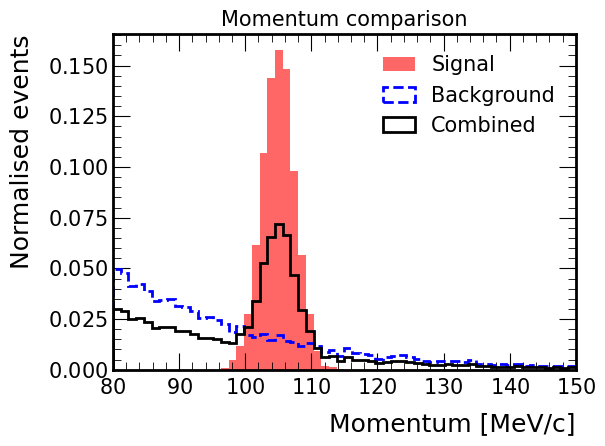

In [21]:
logger.log("Creating 1D histogram overlay with multiple datasets", "info")

# Create a dictionary of datasets for overlay plotting
hist_data = {
    "Signal": signal_momentum,
    "Background": background_momentum,
    "Combined": all_momentum
}

# Define custom styles for each histogram
overlay_styles = {
    "Signal": {
        "histtype": "stepfilled",
        "color": "red",
        "alpha": 0.6,
        "linewidth": 1.5
    },
    "Background": {
        "histtype": "step", 
        "color": "blue",
        "linewidth": 2,
        "linestyle": "--"
    },
    "Combined": {
        "histtype": "step",
        "color": "black",
        "linewidth": 2
    }
}

plotter.plot_1D_overlay(
    hists_dict=hist_data,
    styles=overlay_styles,
    nbins=60,
    xmin=80,
    xmax=150,
    title="Momentum comparison",
    xlabel="Momentum [MeV/c]",
    ylabel="Normalised events",
    norm_by_area=True,  # Normalise for comparison
    leg_pos="best",
    out_path="demo_momentum_overlay.png"
)

## 7. Weighted histogram overlay

Demonstrate weighted histograms, which are useful when dealing with corrections to data. 

[pyplot demo] ⭐️ Demonstrating weighted histogram functionality
[pyplot] ✅ Wrote:
	demo_momentum_weighted.png


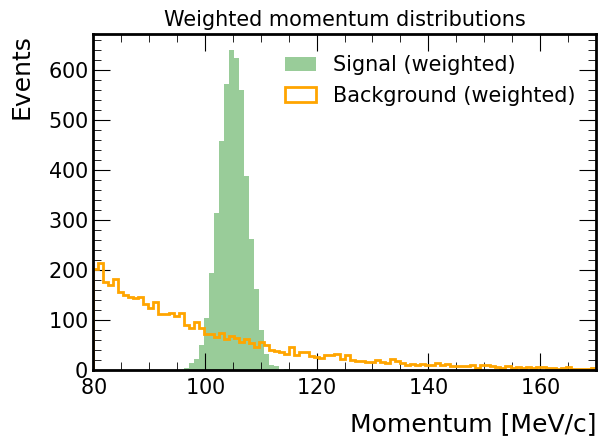

In [32]:
logger.log("Demonstrating weighted histogram functionality", "info")

# Demonstrate weighted histograms
weighted_data = {
    "Signal (weighted)": signal_momentum,
    "Background (weighted)": background_momentum
}

weights_list = [signal_weights, background_weights]

weighted_styles = {
    "Signal (weighted)": {
        "histtype": "bar",
        "color": "green",
        "alpha": 0.4
    },
    "Background (weighted)": {
        "histtype": "step",
        "color": "orange", 
        "linewidth": 2
    }
}

plotter.plot_1D_overlay(
    hists_dict=weighted_data,
    weights=weights_list,
    styles=weighted_styles,
    nbins=100,
    xmin=80,
    xmax=170,
    title="Weighted momentum distributions",
    xlabel="Momentum [MeV/c]",
    ylabel="Events",
    out_path="demo_momentum_weighted.png"
)

## 8. 2D histogram

Create a 2D histogram to explore correlations between two variables, in this case momentum vs time.

[pyplot demo] ⭐️ Creating 2D histogram showing momentum vs time correlation
[pyplot] ✅ Wrote:
	demo_momentum_vs_time.png


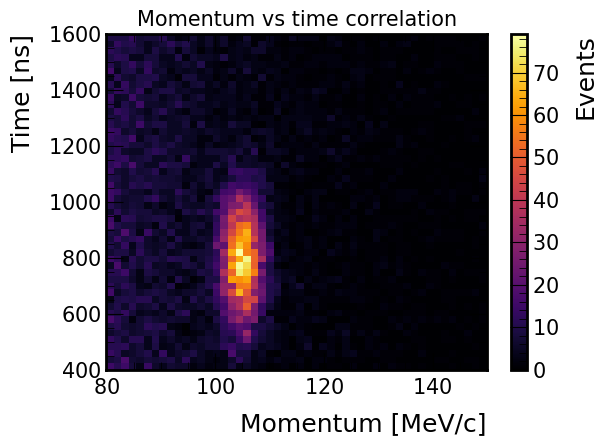

In [30]:
logger.log("Creating 2D histogram showing momentum vs time correlation", "info")

# Create a 2D histogram showing correlation between momentum and time
plotter.plot_2D(
    x=all_momentum,
    y=all_time,
    nbins_x=50,
    nbins_y=50,
    xmin=80,
    xmax=150,
    ymin=400,
    ymax=1600,
    title="Momentum vs time correlation",
    xlabel="Momentum [MeV/c]",
    ylabel="Time [ns]",
    zlabel="Events",
    cmap="inferno",
    out_path="demo_momentum_vs_time.png"
)

## 9. 2D histogram overlay

Demonstrate overlaying two 2D histograms with different colour maps. This is useful for comparing correlations between different distributions.

[pyplot demo] ⭐️ Demonstrating 2D histogram overlay capabilities
[pyplot] ✅ Wrote:
	demo_2d_overlay.png


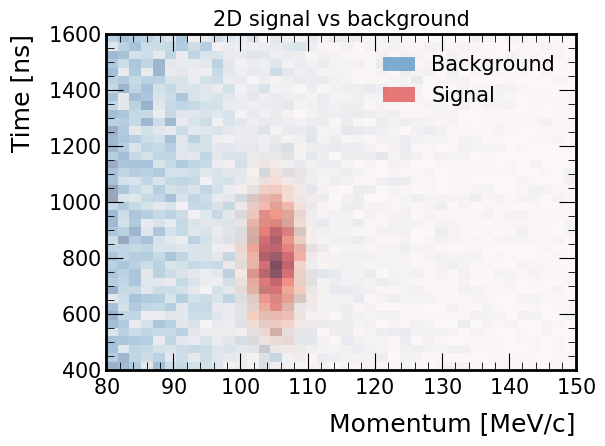

In [33]:
logger.log("Demonstrating 2D histogram overlay capabilities", "info")

# Demonstrate 2D overlay with signal and background
plotter.plot_2D_overlay(
    x1=background_momentum, 
    y1=background_time,
    x2=signal_momentum,
    y2=signal_time,
    nbins_x=40,
    nbins_y=40,
    xmin=80,
    xmax=150,
    ymin=400,
    ymax=1600,
    title="2D signal vs background",
    xlabel="Momentum [MeV/c]",
    ylabel="Time [ns]",
    cmap1="Blues",
    cmap2="Reds",
    alpha=0.6,  # Transparency of the overlay
    labels=["Background", "Signal"],
    leg_pos="upper right",
    out_path="demo_2d_overlay.png"
)

## 10. Log scales

Show how to use logarithmic scales for data spanning multiple orders of magnitude.

[pyplot demo] ⭐️ Creating log scale plot demonstrations
[pyplot] ✅ Wrote:
	demo_log_y.png


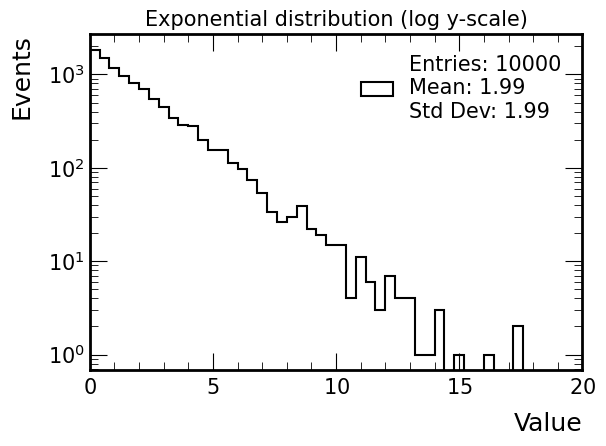

In [34]:
logger.log("Creating log scale plot demonstrations", "info")

# Generate data suitable for log plots
exponential_data = np.random.exponential(2, 10000)
power_law_x = np.logspace(1, 4, 1000)
power_law_y = 1000 * (power_law_x ** -2) + np.random.normal(0, 50, 1000)

# 1D log scale
plotter.plot_1D(
    array=exponential_data,
    nbins=50,
    xmin=0,
    xmax=20,
    title="Exponential distribution (log y-scale)",
    xlabel="Value",
    ylabel="Events", 
    log_y=True,
    out_path="demo_log_y.png"
)

[pyplot] ✅ Wrote:
	demo_2d_log.png


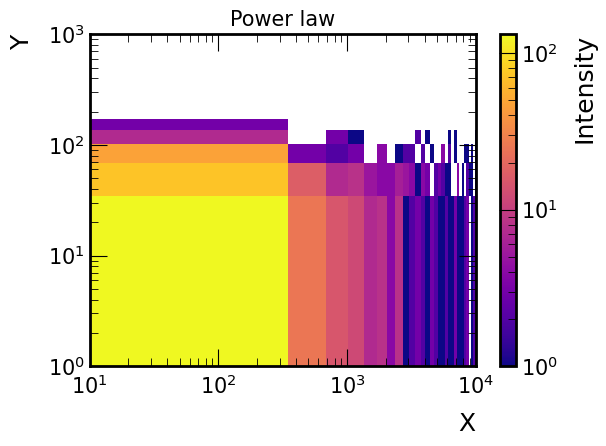

In [46]:
# 2D log scale
plotter.plot_2D(
    x=power_law_x,
    y=power_law_y,
    nbins_x=30,
    nbins_y=30,
    xmin=10,
    xmax=10000,
    ymin=1,
    ymax=1000,
    title="Power law",
    xlabel="X",
    ylabel="Y",
    zlabel="Intensity",
    log_x=True,
    log_y=True,
    log_z=True,
    cmap="plasma",
    out_path="demo_2d_log.png"
)

## 11. Scatter plots

Demonstrate scatter plots with error bars, useful for showing relationships between discrete measured quantities.

[pyplot demo] ⭐️ Creating scatter plot demonstrations
[pyplot] ✅ Wrote:
	demo_scatter.png


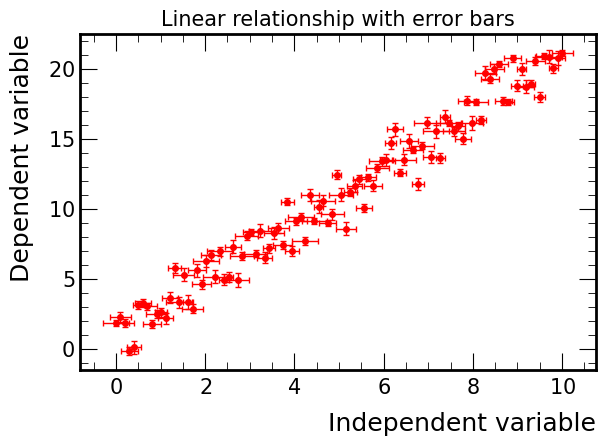

In [38]:
logger.log("Creating scatter plot demonstrations", "info")

# Generate some correlated data for scatter plots
n_points = 100
x_data = np.linspace(0, 10, n_points)
y_data = 2 * x_data + 1 + np.random.normal(0, 1, n_points)
x_errors = np.random.uniform(0.1, 0.3, n_points)
y_errors = np.random.uniform(0.2, 0.5, n_points)

# Single scatter plot
plotter.plot_graph(
    x=x_data,
    y=y_data,
    xerr=x_errors,
    yerr=y_errors,
    title="Linear relationship with error bars",
    xlabel="Independent variable",
    ylabel="Dependent variable", 
    col="red",
    out_path="demo_scatter.png"
)

## 12. Scatter plot overlay

Show how to overlay multiple scatter plots for comparison.

[pyplot demo] ⭐️ Creating multiple scatter plot overlay
[pyplot] ✅ Wrote:
	demo_scatter_overlay.png


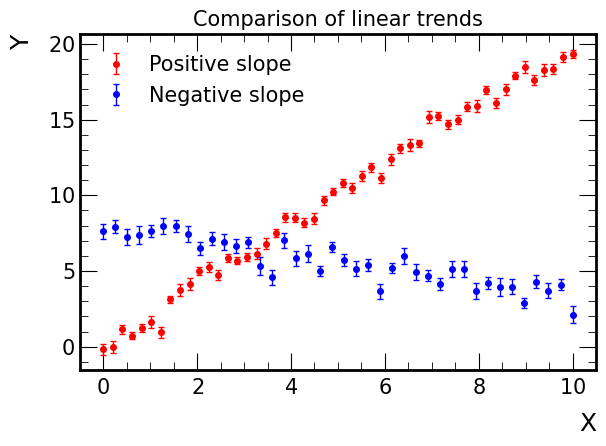

In [39]:
logger.log("Creating multiple scatter plot overlay", "info")

# Generate multiple datasets
x1 = np.linspace(0, 10, 50)
y1 = 2 * x1 + np.random.normal(0, 0.5, 50)
y1_err = np.random.uniform(0.2, 0.4, 50)

x2 = np.linspace(0, 10, 40) 
y2 = -0.5 * x2 + 8 + np.random.normal(0, 0.8, 40)
y2_err = np.random.uniform(0.3, 0.6, 40)

# Organise data for overlay
graph_data = {
    "Positive slope": {
        "x": x1,
        "y": y1,
        "yerr": y1_err
    },
    "Negative slope": {
        "x": x2,
        "y": y2, 
        "yerr": y2_err
    }
}

plotter.plot_graph_overlay(
    graphs=graph_data,
    title="Comparison of linear trends",
    xlabel="X",
    ylabel="Y",
    leg_pos="best",
    out_path="demo_scatter_overlay.png"
)

## 13. Advanced styling

Create a publication-quality plot demonstrating advanced styling techniques, including LaTeX formatting in labels.

[pyplot demo] ⭐️ Demonstrating advanced publication-quality styling
[pyplot] ✅ Wrote:
	demo_publication_style.png


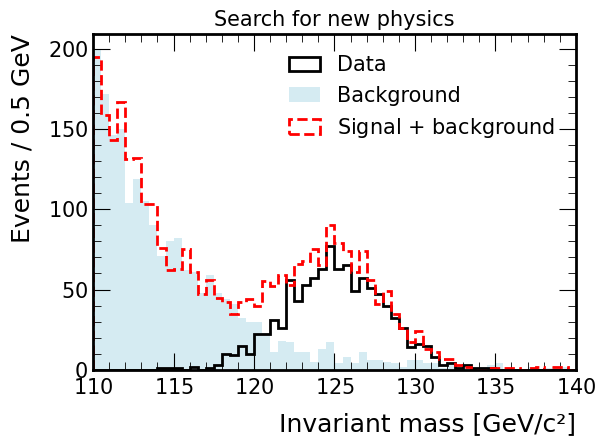

In [40]:
logger.log("Demonstrating advanced publication-quality styling", "info")

# Create publication-quality plot with advanced styling
physics_data = {
    "Data": np.random.normal(125, 3, 1000),
    "Background": np.random.exponential(5, 2000) + 110,
    r"Signal $+$ background": np.concatenate([
        np.random.normal(125, 3, 1000),
        np.random.exponential(5, 2000) + 110
    ])
}

publication_styles = {
    "Data": {
        "histtype": "step",
        "color": "black", 
        "linewidth": 2,
        "linestyle": "-"
    },
    "Background": {
        "histtype": "stepfilled",
        "color": "lightblue",
        "alpha": 0.5,
        "linewidth": 1
    },
    r"Signal $+$ background": {
        "histtype": "step",
        "color": "red",
        "linewidth": 2,
        "linestyle": "--"
    }
}

plotter.plot_1D_overlay(
    hists_dict=physics_data,
    styles=publication_styles,
    nbins=60,
    xmin=110,
    xmax=140,
    title="Search for new physics",
    xlabel="Invariant mass [GeV/c²]",
    ylabel="Events / 0.5 GeV", 
    leg_pos="upper right",
    out_path="demo_publication_style.png"
)

## 14. Summary

Log completion status and provide summary information.

In [41]:
logger.log("All plotting demonstrations completed successfully", "success")
logger.log("Check the generated PNG files to see the different plotting capabilities", "info")

[pyplot demo] ✅ All plotting demonstrations completed successfully
[pyplot demo] ⭐️ Check the generated PNG files to see the different plotting capabilities


## 15. Tips

Some recommendations for effective plotting:

In [43]:
logger.log("Providing plotting best practices and tips", "info")

tips = [
    "Use styles parameter for consistent, publication-quality plots",
    "Always include appropriate axis labels with units", 
    "Use stat_box=True to show statistical information",
    "Consider norm_by_area=True when comparing histograms of different sizes",
    "Use error_bars=True for data with statistical uncertainties",
    "Choose appropriate bin numbers (typically 20-100 for most cases)",
    "Use log scales for data spanning multiple orders of magnitude",
    "Save plots with sufficient DPI (300+) for publications",
    "PNG files work well with Slack and email, PDFs work well with LaTeX"
]

for i, tip in enumerate(tips, 1):
    logger.log(f"Tip {i}: {tip}", "max")

[pyplot demo] ⭐️ Providing plotting best practices and tips
[pyplot demo] 👀 Tip 1: Use styles parameter for consistent, publication-quality plots
[pyplot demo] 👀 Tip 2: Always include appropriate axis labels with units
[pyplot demo] 👀 Tip 3: Use stat_box=True to show statistical information
[pyplot demo] 👀 Tip 4: Consider norm_by_area=True when comparing histograms of different sizes
[pyplot demo] 👀 Tip 5: Use error_bars=True for data with statistical uncertainties
[pyplot demo] 👀 Tip 6: Choose appropriate bin numbers (typically 20-100 for most cases)
[pyplot demo] 👀 Tip 7: Use log scales for data spanning multiple orders of magnitude
[pyplot demo] 👀 Tip 8: Save plots with sufficient DPI (300+) for publications
[pyplot demo] 👀 Tip 9: PNG files work well with Slack and email, PDFs work well with LaTeX


## 16. Getting Help

For detailed documentation on any plotting method, use Python's built-in help system:

In [44]:
logger.log("For more detailed help on any method, use help():", "max")
logger.log("help(plotter.plot_1D)", "max")
logger.log("help(plotter.plot_1D_overlay)", "max") 
logger.log("help(plotter.plot_2D)", "max")
logger.log("help(plotter.plot_2D_overlay)", "max")
logger.log("help(plotter.plot_graph)", "max")
logger.log("help(plotter.plot_graph_overlay)", "max")

# Uncomment any of these lines to see detailed help:
# help(plotter.plot_1D)
# help(plotter.plot_1D_overlay)
# help(plotter.plot_2D)
# help(plotter.plot_2D_overlay)
# help(plotter.plot_graph)
# help(plotter.plot_graph_overlay)

[pyplot demo] 👀 For more detailed help on any method, use help():
[pyplot demo] 👀 help(plotter.plot_1D)
[pyplot demo] 👀 help(plotter.plot_1D_overlay)
[pyplot demo] 👀 help(plotter.plot_2D)
[pyplot demo] 👀 help(plotter.plot_2D_overlay)
[pyplot demo] 👀 help(plotter.plot_graph)
[pyplot demo] 👀 help(plotter.plot_graph_overlay)
